<h1 style="text-align: center;"><strong>Tareas Cortas - Bloque 1.2</strong></h1>


<ul>
<li><strong>Curso:</strong> CE5201: Procesamiento y An&aacute;lisis de Im&aacute;genes Digitales</li>
<li><strong>Estudiante:</strong> Luis Felipe Vargas Jimenez</li>
<li><strong>Carnet:</strong> 2020211831<br /><br /></li>
<li><strong>Pregunta:</strong> 2<br /><br /></li>
</ul>

In [1]:
import cv2

from skimage.util import random_noise
from skimage.filters import median
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

Error MSE: 0.0006382059021269866
Índice SSIM: 0.9044539759638233


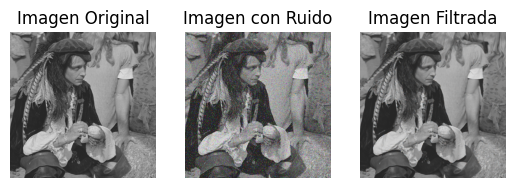

In [2]:

# Ruta a la imagen
image_path = 'imagen1.jpg'

# Leer la imagen
A = cv2.imread(image_path)

# Verificar si la imagen se cargó correctamente
if A is None:
    print(f"Error: No se pudo cargar la imagen en la ruta {image_path}. Verifica la ruta y el nombre del archivo.")
else:
    # Convertir de BGR a RGB
    A = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen original
    plt.subplot(1, 3, 1)
    plt.imshow(A)
    plt.axis('off')
    plt.title("Imagen Original")

    # Eliminar ruido (Sal y Pimienta) de una imagen
    Y = random_noise(A, mode='s&p', amount=0.05)
    Y = np.array(255 * Y, dtype='uint8')  # Convertir a formato de imagen
    plt.subplot(1, 3, 2)
    plt.imshow(Y)
    plt.axis('off')
    plt.title("Imagen con Ruido")

    # Limpiar ruido sal y pimienta con filtro de la mediana
    Z = median(Y, behavior='ndimage')
    plt.subplot(1, 3, 3)
    plt.imshow(Z)
    plt.axis('off')
    plt.title("Imagen Filtrada")

    # Convertir imágenes a float para el cálculo del error
    A_float = img_as_float(A)
    Z_float = img_as_float(Z)

    # Calcular el error MSE (Mean Squared Error)
    mse_error = np.mean((A_float - Z_float) ** 2)

    # Calcular el índice SSIM (Structural Similarity Index) con un tamaño de ventana adecuado
    ssim_index = ssim(A, Z, win_size=7, channel_axis=2)

    # Mostrar los resultados de error
    print(f"Error MSE: {mse_error}")
    print(f"Índice SSIM: {ssim_index}")

    # Mostrar todas las imágenes
    plt.show()


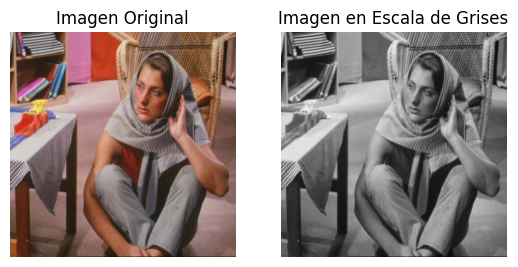

In [3]:
# Ruta a la imagen
image_path = 'imagen4.jpg'

# Leer la imagen
A = cv2.imread(image_path)

# Verificar si la imagen se cargó correctamente
if A is None:
    print(f"Error: No se pudo cargar la imagen en la ruta {image_path}. Verifica la ruta y el nombre del archivo.")
else:
    # Convertir de BGR a RGB para la visualización con Matplotlib
    A_rgb = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)

    # Convertir la imagen a escala de grises
    B = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)

    # Mostrar la imagen original en color
    plt.subplot(1, 2, 1)
    plt.imshow(A_rgb)
    plt.axis('off')
    plt.title("Imagen Original")

    # Mostrar la imagen en escala de grises
    plt.subplot(1, 2, 2)
    plt.imshow(B, cmap='gray')
    plt.axis('off')
    plt.title("Imagen en Escala de Grises")

    # Mostrar ambas imágenes
    plt.show()

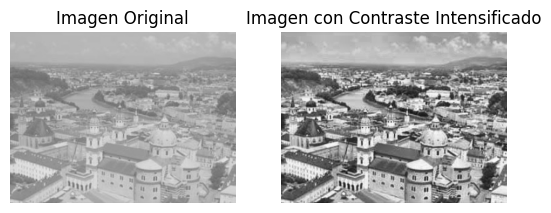

In [4]:
# Ruta a la imagen
image_path = 'imagen2.jpg'

# Leer la imagen
A = cv2.imread(image_path)

# Verificar si la imagen se cargó correctamente
if A is None:
    print(f"Error: No se pudo cargar la imagen en la ruta {image_path}. Verifica la ruta y el nombre del archivo.")
else:
    # Convertir de BGR a RGB para la visualización con Matplotlib
    A_rgb = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)

    # Convertir la imagen a escala de grises (necesario para CLAHE)
    A_gray = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)

    # Aplicar CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    B = clahe.apply(A_gray)

    # Convertir de vuelta a RGB para mostrar junto a la imagen original
    B_rgb = cv2.cvtColor(B, cv2.COLOR_GRAY2RGB)

    # Mostrar la imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(A_rgb)
    plt.axis('off')
    plt.title("Imagen Original")

    # Mostrar la imagen con contraste intensificado
    plt.subplot(1, 2, 2)
    plt.imshow(B_rgb)
    plt.axis('off')
    plt.title("Imagen con Contraste Intensificado")

    # Mostrar ambas imágenes
    plt.show()

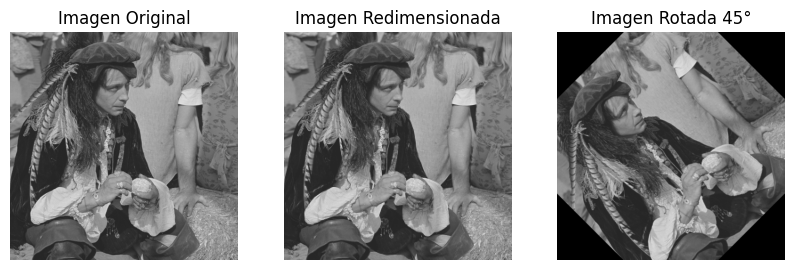

In [5]:
import cv2
import matplotlib.pyplot as plt

# Ruta a la imagen
image_path = 'imagen1.jpg'

# Leer la imagen
A = cv2.imread(image_path)

# Verificar si la imagen se cargó correctamente
if A is None:
    print(f"Error: No se pudo cargar la imagen en la ruta {image_path}. Verifica la ruta y el nombre del archivo.")
else:
    # Convertir de BGR a RGB para la visualización con Matplotlib
    A_rgb = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)

    # Redimensionar la imagen a 256x256
    B = cv2.resize(A_rgb, (256, 256))

    # Rotar la imagen 45 grados
    (h, w) = A_rgb.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, 45, 1.0)
    C = cv2.warpAffine(A_rgb, M, (w, h))

    # Ajustar el tamaño de la figura
    plt.figure(figsize=(10, 5))  # Incrementar el tamaño de la figura

    # Mostrar la imagen original
    plt.subplot(1, 3, 1)
    plt.imshow(A_rgb)
    plt.axis('off')
    plt.title("Imagen Original")

    # Mostrar la imagen redimensionada
    plt.subplot(1, 3, 2)
    plt.imshow(B)
    plt.axis('off')
    plt.title("Imagen Redimensionada")

    # Mostrar la imagen rotada
    plt.subplot(1, 3, 3)
    plt.imshow(C)
    plt.axis('off')
    plt.title("Imagen Rotada 45°")

    # Mostrar todas las imágenes
    plt.show()


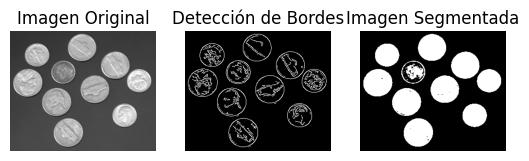

In [6]:
import cv2
import numpy as np
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

# Ruta a la imagen
image_path = 'imagen3.jpg'

# Leer la imagen
A = cv2.imread(image_path)

# Verificar si la imagen se cargó correctamente
if A is None:
    print(f"Error: No se pudo cargar la imagen en la ruta {image_path}. Verifica la ruta y el nombre del archivo.")
else:
    # Convertir de BGR a RGB para la visualización con Matplotlib
    A_rgb = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)

    # Convertir la imagen a escala de grises
    A_gray = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)

    # Detectar bordes usando el detector de Canny
    B = cv2.Canny(A_gray, 100, 200)

    # Calcular un umbral utilizando Otsu
    C = threshold_otsu(A_gray)

    # Segmentar la imagen utilizando el umbral calculado
    D = A_gray > C

    # Mostrar la imagen original
    plt.subplot(1, 3, 1)
    plt.imshow(A_rgb)
    plt.axis('off')
    plt.title("Imagen Original")

    # Mostrar la imagen con detección de bordes
    plt.subplot(1, 3, 2)
    plt.imshow(B, cmap='gray')
    plt.axis('off')
    plt.title("Detección de Bordes")

    # Mostrar la imagen segmentada
    plt.subplot(1, 3, 3)
    plt.imshow(D, cmap='gray')
    plt.axis('off')
    plt.title("Imagen Segmentada")

    # Mostrar todas las imágenes
    plt.show()
